<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Откроем-файл-и-ознакомимся-с-данными" data-toc-modified-id="Откроем-файл-и-ознакомимся-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файл и ознакомимся с данными</a></span></li><li><span><a href="#Подготовка-текста" data-toc-modified-id="Подготовка-текста-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка текста</a></span></li><li><span><a href="#Очистим-текст" data-toc-modified-id="Очистим-текст-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Очистим текст</a></span><ul class="toc-item"><li><span><a href="#Лемматизируем,-токенизируем-и-исключим-стоп-слова" data-toc-modified-id="Лемматизируем,-токенизируем-и-исключим-стоп-слова-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Лемматизируем, токенизируем и исключим стоп-слова</a></span></li><li><span><a href="#Проверим-на-дисбаланс-классов-по-целевому-признаку" data-toc-modified-id="Проверим-на-дисбаланс-классов-по-целевому-признаку-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Проверим на дисбаланс классов по целевому признаку</a></span></li></ul></li><li><span><a href="#Подсчет-слов-и-длина-слов-в-тексте" data-toc-modified-id="Подсчет-слов-и-длина-слов-в-тексте-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подсчет слов и длина слов в тексте</a></span><ul class="toc-item"><li><span><a href="#Разделим-данные-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделим-данные-на-обучающую-и-тестовую-выборки-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Разделим данные на обучающую и тестовую выборки</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LGBMClassifier</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-лучшего-решения-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшего-решения-на-тестовой-выборке-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка лучшего решения на тестовой выборке</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект Машинная обработка текстов

Интернет-магазин запускает новый сервис, позволяющий пользователям редактировать и дополнять описания товаров в формате вики-сообщества. Пользователи смогут предлагать правки и комментировать изменения других.

Магазину требуется инструмент для выявления токсичных комментариев и их отправки на модерацию.

**Задача:** обучить модель для классификации комментариев на позитивные и негативные, используя предоставленный размеченный датасет. Целевая метрика — F1-score не менее 0.75.


Совместно с Заказчиком определили список моделей для исследования:


- LogisticRegression
- LGBMClassifier
- DecisionTreeClassifier


**План проекта**

1. Загрузить и подготовить данные.
2. Обучить модели. 
3. Проверить данные на тестовой выборке и сделать выводы.


**Описание данных**

Данные находятся в файле toxic_comments.csv:

- text - текст комментария
- toxic — целевой признак

## Загрузка и подготовка данных

### Загрузим необходимые библиотеки

In [1]:
!pip install gensim
!pip install xgboost
!pip install lightgbm
!pip install wordcloud
!pip install tqdm
!pip install matplotlib==3.3.4 seaborn==0.11.1

In [2]:
# 1. Базовые библиотеки
import os
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.notebook import tqdm
import time

# 2. NLTK и текстовая обработка
import nltk
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from matplotlib import rc

# Загрузка необходимых ресурсов NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# 3. Модели машинного обучения
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (f1_score, recall_score, precision_score, confusion_matrix)
from sklearn.model_selection import cross_val_score

# 4. Дополнительные инструменты и фильтрация предупреждений
from warnings import simplefilter

print('Libraries imported')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Libraries imported


In [3]:
RANDOM_STATE = 42

Напишем функцию по замеру времени обучения модели

In [4]:
def measure_training_time(model, X_train, y_train):
    start_time_training = time.time()
    # Обучение модели на данных
    model.fit(X_train, y_train)
    end_time_training = time.time()
    training_time = end_time_training - start_time_training
    return training_time

### Откроем файл и ознакомимся с данными

In [5]:
# Основной путь к файлу
main_path = r'C:\Users\rx330\Desktop\Masha\\PORTFOLIO\Text_project_data\toxic_comments.csv'
# Альтернативные пути к файлам
pth1 = '/datasets/toxic_comments.csv'

# Проверяем существование основного файла, если его нет - ищем в других папках
if os.path.exists(main_path):
    data = pd.read_csv(main_path, index_col=0)
elif os.path.exists(pth1):
    data = pd.read_csv(pth1, index_col=0)
else:
    print('Something is wrong')

In [6]:
display(data.shape)
data.info()
display(data.head(10))

(159292, 2)

<class 'pandas.core.frame.DataFrame'>
Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


Файл состоит из 159292 строк и 2 столбца.

Тип признака toxic можно изменить на более короткий, чтобы уменьшить количество занимаемой таблицей памяти.

In [7]:
data['toxic'] = data['toxic'].astype('uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  uint8 
dtypes: object(1), uint8(1)
memory usage: 2.6+ MB


Объём занимаемой памяти уменьшился на 30%.

## Подготовка текста

Проверим на наличие дубликатов и пропусков

In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

text     0
toxic    0
dtype: int64

Дубликатов и пропусков не обнаружено

### Очистим текст

Приведем текст к нижнему регистру, удалим лишние символы и пробелы, оставим только буквы английского алфавита

In [10]:
tqdm.pandas()

In [11]:
def cleaning(text):
    text = re.sub(r'(?:\n|\r)', ' ', text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text).strip()
    text = text.lower()
    return text

data['text'] = data['text'].progress_apply(cleaning)
data.head()

  0%|          | 0/159292 [00:00<?, ?it/s]

,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on impr...,0
4,you sir are my hero any chance you remember...,0


### Лемматизируем, токенизируем и исключим стоп-слова

In [12]:
# Инициализация стоп-слов и лемматизатора
stop_words_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
# Функция для сопоставления частей речи
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Функция для лемматизации текста
def lem(text): 
    tokens = word_tokenize(text) 
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(word)) 
        for word in tokens if word.lower() not in stop_words_set
    ]
    return " ".join(lemmatized_tokens)

In [14]:
# Применение функции к столбцу текста
%time data['lemmatized_text'] = data['text'].progress_apply(lem)
data.head(10)

  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: total: 1h 5min 8s
Wall time: 1h 5min 53s


,text,toxic,lemmatized_text
0,explanation why the edits made under my userna...,0,explanation edits make username hardcore metal...
1,d aww he matches this background colour i m s...,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it...,0,hey man really try edit war guy constantly rem...
3,more i can t make any real suggestions on impr...,0,make real suggestion improvement wonder sectio...
4,you sir are my hero any chance you remember...,0,sir hero chance remember page
5,congratulations from me as well use the tools...,0,congratulation well use tool well talk
6,cocksucker before you piss around on my work,1,cocksucker piss around work
7,your vandalism to the matt shirvington article...,0,vandalism matt shirvington article revert plea...
8,sorry if the word nonsense was offensive to ...,0,sorry word nonsense offensive anyway intend wr...
9,alignment on this subject and which are contra...,0,alignment subject contrary dulithgow


In [15]:
# Словарь замен для сокращений
contractions = {
    r"\bi[\' ]m\b": "i am",
    r"\byou[\' ]re\b": "you are",
    r"\bhe[\' ]s\b": "he is",
    r"\bit[\' ]s\b": "it is",
    r"\bcan[\' ]t\b": "cannot",
    r"\bdon[\' ]t\b": "do not",
    r"\baren[\' ]t\b": "are not"
}

# Функция замены
def replace_contractions(text):
    original_text = text  # Сохраняем исходный текст для сравнения
    for contraction, full_form in contractions.items():
        text = re.sub(contraction, full_form, text, flags=re.IGNORECASE)
    return text

# Применение замены ко всем текстам в столбце
data['lemmatized_text'] = data['lemmatized_text'].apply(replace_contractions)

# Просмотр результата после замены
display(data.head(10))

,text,toxic,lemmatized_text
0,explanation why the edits made under my userna...,0,explanation edits make username hardcore metal...
1,d aww he matches this background colour i m s...,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it...,0,hey man really try edit war guy constantly rem...
3,more i can t make any real suggestions on impr...,0,make real suggestion improvement wonder sectio...
4,you sir are my hero any chance you remember...,0,sir hero chance remember page
5,congratulations from me as well use the tools...,0,congratulation well use tool well talk
6,cocksucker before you piss around on my work,1,cocksucker piss around work
7,your vandalism to the matt shirvington article...,0,vandalism matt shirvington article revert plea...
8,sorry if the word nonsense was offensive to ...,0,sorry word nonsense offensive anyway intend wr...
9,alignment on this subject and which are contra...,0,alignment subject contrary dulithgow


### Проверим на дисбаланс классов по целевому признаку

In [16]:
data['toxic'].value_counts()

toxic
0    143106
1     16186
Name: count, dtype: int64

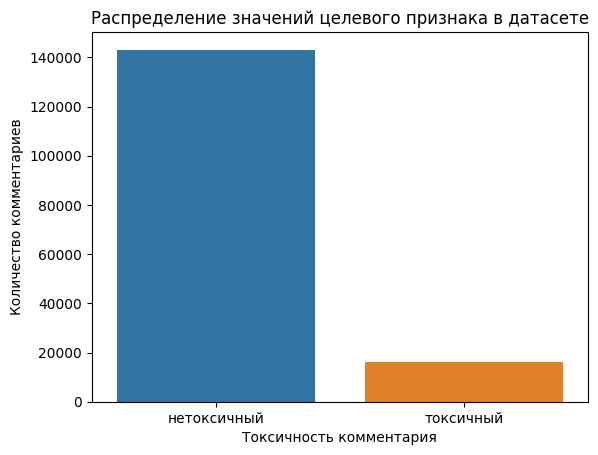

In [17]:
sns.countplot(x = 'toxic', data = data)
plt.title('Распределение значений целевого признака в датасете')
plt.xlabel('Токсичность комментария')
plt.ylabel('Количество комментариев')
plt.xticks([0,1],['нетоксичный', 'токсичный'])
None

Наблюдается дисбаланс классов, нужно учесть это при разбиении на тренирововчную и тестовую выборки

### Подсчет слов и длина слов в тексте

Можно посмотреть, как количество слов в предложении или длина слов в тексте связаны с таргетом. Например, длинные и сложные слова могут чаще встречаться в позитивных или профессиональных текстах, а короткие и простые — в негативных. Если обнаружится, что для разных классов тексты действительно сильно различаются по этим признакам, то их можно добавить в модель. Так модель сможет лучше различать тексты, опираясь не только на слова, но и на такие характеристики.

In [18]:
# Загрузка ресурса для SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Инициализация SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Функция для анализа текста
def analyze_text(row):
    # Подсчет количества слов
    word_count = len(row['text'].split())
    # Подсчет средней длины слов, если количество слов больше нуля
    avg_word_length = sum(len(word) for word in row['text'].split()) / word_count if word_count > 0 else 0
    # Оценка сентимента
    sentiment_score = sia.polarity_scores(row['text'])['compound']
    return pd.Series([word_count, avg_word_length, sentiment_score])

# Применение функции к каждому тексту
data[['word_count', 'avg_word_length', 'sentiment_score']] = data.progress_apply(analyze_text, axis=1)

# Посмотрим на полученные данные
display(data)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/159292 [00:00<?, ?it/s]

,text,toxic,lemmatized_text,word_count,avg_word_length,sentiment_score
0,explanation why the edits made under my userna...,0,explanation edits make username hardcore metal...,46.0,4.413043,0.5574
1,d aww he matches this background colour i m s...,0,aww match background colour seemingly stuck th...,16.0,4.562500,0.2263
2,hey man i m really not trying to edit war it...,0,hey man really try edit war guy constantly rem...,44.0,4.227273,-0.1779
3,more i can t make any real suggestions on impr...,0,make real suggestion improvement wonder sectio...,116.0,4.189655,0.4019
4,you sir are my hero any chance you remember...,0,sir hero chance remember page,14.0,3.571429,0.6808
...,...,...,...,...,...,...
159446,and for the second time of asking when your v...,0,second time ask view completely contradicts co...,46.0,4.934783,0.1548
159447,you should be ashamed of yourself that is a ...,0,ashamed horrible thing put talk page,17.0,3.882353,-0.7650
159448,spitzer umm theres no actual article for pr...,0,spitzer umm there actual article prostitution ...,11.0,5.727273,-0.2960
159449,and it looks like it was actually you who put ...,0,look like actually put speedy first version de...,25.0,3.640000,0.3612


Построим графики для визуализации

C:\Users\rx330\anaconda3\envs\practicum\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rx330\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:244: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'edges        widths  
0.000000     2.175194    0.0
2.175194     2.175194    0.0
4.350388     2.175194    0.0
6.525581     2.175194    0.0
8.700775     2.175194    0.0
                        ... 
1392.124031  2.175194    0.0
1394.299225  2.175194    0.0
1396.474419  2.175194    0.0
1398.649612  2.175194    0.0
1400.824806  2.175194    0.0
Name: ((hue, 1),), Length: 645, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype 

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

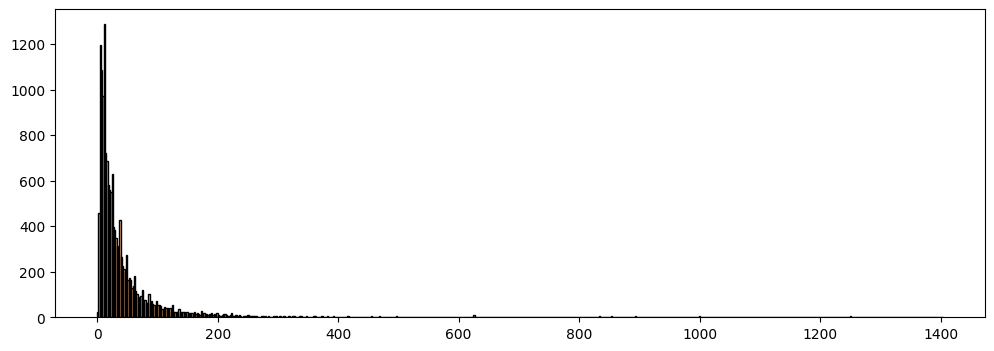

In [19]:
# Гистограмма для word_count
plt.figure(figsize=(12, 4))
sns.histplot(data, x='word_count', hue='toxic', multiple='stack', kde=True)
plt.title('Распределение количества слов по токсичности')
plt.show()

# Гистограмма для avg_word_length
plt.figure(figsize=(12, 4))
sns.histplot(data, x='avg_word_length', hue='toxic', multiple='stack', kde=True)
plt.title('Распределение средней длины слов по токсичности')
plt.show()

# Гистограмма для sentiment_score
plt.figure(figsize=(12, 4))
sns.histplot(data, x='sentiment_score', hue='toxic', multiple='stack', kde=True)
plt.title('Распределение сентимент-оценки по токсичности')
plt.show()

Вычислим корреляцию

In [20]:
# Вычисляем корреляцию
correlations = data[['toxic', 'word_count', 'avg_word_length', 'sentiment_score']].corr()
print(correlations)

                    toxic  word_count  avg_word_length  sentiment_score
toxic            1.000000   -0.046720        -0.000177        -0.307413
word_count      -0.046720    1.000000         0.000347         0.090163
avg_word_length -0.000177    0.000347         1.000000        -0.002351
sentiment_score -0.307413    0.090163        -0.002351         1.000000


**Вывод**:

- Корреляция между toxic и sentiment_score (-0.307):
Между токсичностью и сентимент-оценкой наблюдается умеренная отрицательная корреляция. Это говорит о том, что более негативные тексты (с низкими значениями sentiment_score) имеют тенденцию быть более токсичными. Данный признак может быть полезен для модели, так как помогает различать токсичные и нетоксичные тексты.

- Корреляция между toxic и avg_word_length (-0.0002):
Корреляция между токсичностью и средней длиной слов практически отсутствует. Это означает, что средняя длина слов в тексте не оказывает заметного влияния на уровень токсичности. Вероятно, этот признак не принесет пользы для модели.

- Корреляция между toxic и word_count (-0.047):
Корреляция между количеством слов и токсичностью также близка к нулю, что говорит об отсутствии значимой связи между длиной текста (в количестве слов) и его токсичностью. Этот признак, скорее всего, не окажет полезного влияния на модель.

- Корреляция между word_count, avg_word_length и sentiment_score:
Видно, что word_count имеет слабую положительную корреляцию с sentiment_score (0.090), но это значение очень незначительно. avg_word_length и sentiment_score также имеют слабую отрицательную корреляцию (-0.002), что не дает ценной информации о связи между ними.

**ИТОГ**

- sentiment_score — важный признак, так как он имеет умеренную корреляцию с токсичностью. Его следует использовать в модели.
- avg_word_length и word_count имеют слабую или нулевую корреляцию с токсичностью. Возможно, их можно исключить, так как они, вероятно, не добавят полезной информации для модели.

Посмотрим, какие слова встречаются чаще всего

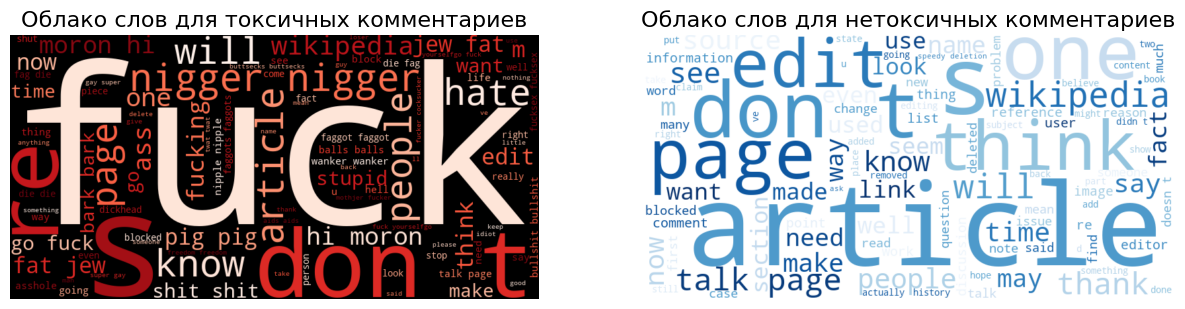

In [21]:
# Указание пути к шрифту TrueType
font_path = r'C:\Users\rx330\Desktop\Masha\PORTFOLIO\dejavu-sans\DejaVuSans.ttf'

# Разделение текста на токсичные и нетоксичные комментарии
toxic_comments = " ".join(data[data['toxic'] == 1]['text'])
non_toxic_comments = " ".join(data[data['toxic'] == 0]['text'])

# Настройка параметров для облаков слов
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(toxic_comments)
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=100).generate(non_toxic_comments)

# Построение графиков
plt.figure(figsize=(15, 10))

# Облако слов для токсичных комментариев
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для токсичных комментариев', fontsize=16)

# Облако слов для нетоксичных комментариев
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для нетоксичных комментариев', fontsize=16)

plt.show()

Самое часто встречающееся слово в негативных комментариях - fuck, в обычных - article

### Разделим данные на обучающую и тестовую выборки

In [22]:
X = data['lemmatized_text']
y = data['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE, stratify=y)

print(X_train.shape[0])
print(X_test.shape[0])

79646
79646


Данные обработаны и разделены, готовы к обучению моделей

**Вывод**:
- Файл состоит из 159292 строк и 5 столбцов, пропусков, дубликатов не обнаружено
- Наблюдается дисбаланс классов
- Тексты переведены в нижний регистр, оставлены только буквы английского алфавита
- Тексты токинезорованы и лемматизированы с помощью WordNetLemmatizer
- Датасет разделен на тренировочную и тестовую выборки в отношении 50/50 с сохранением пропорций значений целевого признака

## Обучение

Напишем функции для вывода прогресса выполнения кода

In [23]:
# Настраиваем `tqdm` для работы с `GridSearchCV`
class TqdmSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = np.prod([len(v) for params in self.param_grid for v in params.values()])

        with tqdm(total=n_candidates) as pbar:
            def _callback():
                pbar.update(1)
            self._callback = _callback
            
            print(f"Форма X: {X.shape}, Форма y: {y.shape}")
            print(f"Параметры: {self.param_grid}")

            super().fit(X, y, **fit_params)
        pbar.close()

In [24]:
# Создаем обертку `RandomizedSearchCV` для добавления индикатора прогресса
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = self.n_iter  # Количество итераций поиска
        with tqdm(total=n_candidates) as pbar:
            def _callback(*args):
                pbar.update(1)
            self._callback = _callback
            return super().fit(X, y, **fit_params)

### LogisticRegression

In [25]:
simplefilter(action='ignore', category=FutureWarning)

# Инициализация модели
model = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', max_iter=1000)

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_set, sublinear_tf=True)),
    ('logreg', model)
])

# Гиперпараметры для перебора
param_grid = [
    {'tfidf__ngram_range': ((1,1), (1,2)),
     'logreg__C': [0.1, 1, 10]}
]

# GridSearchCV для поиска лучшего параметра C
lr = TqdmSearchCV(pipeline_lr, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Обучение с использованием кросс-валидации для подбора гиперпараметра C
%time lr.fit(X_train, y_train)

# Лучшие параметры и среднее значение f1 на кросс-валидации
best_model_lr = lr.best_estimator_
best_score_lr = round(lr.best_score_, 4)
best_params_lr = lr.best_params_

# Замер времени обучения лучшей модели
training_time_lr = measure_training_time(best_model_lr, X_train, y_train)

# Вывод результатов
print(f"Время обучения лучшей модели: {training_time_lr:.4f} секунд")
print("Лучшее значение f1 по кросс-валидации:", best_score_lr)
print("Лучший параметр C:", best_params_lr)

  0%|          | 0/6 [00:00<?, ?it/s]

Форма X: (79646,), Форма y: (79646,)
Параметры: [{'tfidf__ngram_range': ((1, 1), (1, 2)), 'logreg__C': [0.1, 1, 10]}]
CPU times: total: 55.1 s
Wall time: 2min 51s
Время обучения лучшей модели: 47.3725 секунд
Лучшее значение f1 по кросс-валидации: 0.774
Лучший параметр C: {'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}


In [26]:
table = pd.DataFrame([['LogisticRegression', training_time_lr, best_params_lr, best_score_lr]],
                    columns=['Model', 'Training time', 'Params', 'F1'])
table

,Model,Training time,Params,F1
0,LogisticRegression,47.372525,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.774


### LGBMClassifier

In [27]:
# Создание модели LightGBM
model_LGMB = LGBMClassifier(class_weight='balanced', random_state=RANDOM_STATE, verbose=-1)

pipeline_LGMB = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_set, sublinear_tf=True)),
    ('LGMB', model_LGMB)
])

# Гиперпараметры для перебора
param_grid = {
    'tfidf__ngram_range': ((1,1),(1,2)),
    'LGMB__learning_rate': [0.1, 1],
    'LGMB__n_estimators': [x for x in range(10,51,10)]
}

lgbm = TqdmRandomizedSearchCV(
    pipeline_LGMB,
    param_distributions=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=1
)

# Обучение модели
%time lgbm.fit(X_train, y_train)

# Обучение лучшей модели и замер времени
best_model_lgbm = lgbm.best_estimator_

training_time_lgbm = measure_training_time(best_model_lgbm, X_train, y_train)
lgbm_best_params = lgbm.best_params_
lgbm_best_score = round(lgbm.best_score_, 4)

print(f"Время обучения лучшей модели: {training_time_lgbm:.4f} секунд")
print("Лучшие параметры:", lgbm_best_params)
print("Лучшее значение f1:", lgbm_best_score)

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 15min 43s
Wall time: 10min 45s
Время обучения лучшей модели: 49.9533 секунд
Лучшие параметры: {'tfidf__ngram_range': (1, 2), 'LGMB__n_estimators': 50, 'LGMB__learning_rate': 0.1}
Лучшее значение f1: 0.7051


In [28]:
table.loc[len(table.index )] = ['LGBMClassifier', training_time_lgbm, lgbm_best_params, lgbm_best_score]
table

,Model,Training time,Params,F1
0,LogisticRegression,47.372525,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.7740
1,LGBMClassifier,49.953327,"{'tfidf__ngram_range': (1, 2), 'LGMB__n_estima...",0.7051


## DecisionTreeClassifier

In [29]:
model_tree = DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)

pipeline_tree = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_set, sublinear_tf=True)),
    ('TREE', model_tree)
])

param_grid = [
    {'tfidf__ngram_range': ((1,1),(1,2)),
     'TREE__max_depth': [x for x in range(30,51,5)]}]

tree = TqdmSearchCV(
    pipeline_tree, 
    param_grid=param_grid, 
    cv=3, 
    scoring='f1',
    n_jobs=-1)

# Обучение модели
%time tree.fit(X_train, y_train)

# Обучение лучшей модели и замер времени
best_model_tree = tree.best_estimator_

training_time_tree = measure_training_time(best_model_tree, X_train, y_train)
tree_best_params = tree.best_params_
tree_best_score = round(tree.best_score_, 4)

print(f"Время обучения лучшей модели: {training_time_lgbm:.4f} секунд")
print("Лучшие параметры:", lgbm_best_params)
print("Лучшее значение f1:", lgbm_best_score)

  0%|          | 0/10 [00:00<?, ?it/s]

Форма X: (79646,), Форма y: (79646,)
Параметры: [{'tfidf__ngram_range': ((1, 1), (1, 2)), 'TREE__max_depth': [30, 35, 40, 45, 50]}]
CPU times: total: 32 s
Wall time: 13min 33s
Время обучения лучшей модели: 49.9533 секунд
Лучшие параметры: {'tfidf__ngram_range': (1, 2), 'LGMB__n_estimators': 50, 'LGMB__learning_rate': 0.1}
Лучшее значение f1: 0.7051


In [30]:
table.loc[len(table.index )] = ['DecisionTreeClassifier', training_time_tree, tree_best_params, tree_best_score]
table

,Model,Training time,Params,F1
0,LogisticRegression,47.372525,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.7740
1,LGBMClassifier,49.953327,"{'tfidf__ngram_range': (1, 2), 'LGMB__n_estima...",0.7051
2,DecisionTreeClassifier,29.633222,"{'TREE__max_depth': 45, 'tfidf__ngram_range': ...",0.6375


Лучшие результаты показала модель LogisticRegression, используем ее для предсказания тональности текста на тестовой выборке.

## Проверка лучшего решения на тестовой выборке

In [31]:
pred = best_model_lr.predict(X_test)

f1_test_score = round(f1_score(y_test, pred), 2)
precision_test_score = round(precision_score(y_test, pred), 2)
recall_test_score = round(recall_score(y_test, pred), 2)

print('Значение f1 на тестовой выборке: ', f1_test_score)
print('Значение precision на тестовой выборке: ', precision_test_score)
print('Значение recall на тестовой выборке: ', recall_test_score)

Значение f1 на тестовой выборке:  0.78
Значение precision на тестовой выборке:  0.78
Значение recall на тестовой выборке:  0.79


Построим матрицу ошибок

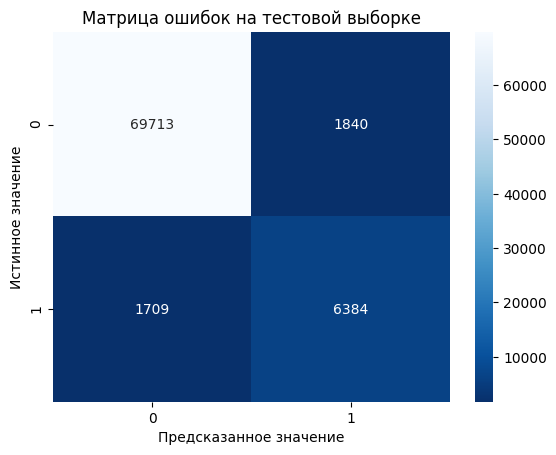

In [32]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок на тестовой выборке')
plt.ylabel('Истинное значение')
plt.xlabel('Предсказанное значение')
plt.show()
None

Посмотрим, какие слова являются наиболее важными для классификации с точки зрения модели

In [33]:
tfidf = best_model_lr.named_steps['tfidf']
tfidf.fit(X_train)  
# Получение списка признаков
feature_names = tfidf.get_feature_names()
feature_names

['aa',
 'aa aa',
 'aa accord',
 'aa accuse',
 'aa along',
 'aa already',
 'aa article',
 'aa baltimore',
 'aa bb',
 'aa bbc',
 'aa best',
 'aa border',
 'aa bust',
 'aa cause',
 'aa change',
 'aa could',
 'aa different',
 'aa dog',
 'aa edits',
 'aa end',
 'aa even',
 'aa filter',
 'aa former',
 'aa framerate',
 'aa full',
 'aa give',
 'aa honestly',
 'aa ja',
 'aa jpg',
 'aa likewise',
 'aa literature',
 'aa make',
 'aa ment',
 'aa might',
 'aa namely',
 'aa page',
 'aa play',
 'aa prove',
 'aa put',
 'aa really',
 'aa require',
 'aa resident',
 'aa samael',
 'aa since',
 'aa street',
 'aa svc',
 'aa talk',
 'aa three',
 'aa vertical',
 'aa well',
 'aa wikipedia',
 'aaa',
 'aaa dea',
 'aaa im',
 'aaa mean',
 'aaa pad',
 'aaa page',
 'aaa rat',
 'aaaa',
 'aaaa aa',
 'aaaaaaaaaah',
 'aaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaaadm',
 'aaaaaaaaadm rw',
 'aaaaaaaaaq',
 'aaaaaaaaaq kpiivnfneei',
 'aaaaaaaacfo',
 'aaaaaaaacfo expz',
 'aaaaaaaaczy',
 'aaaaaaaaczy zwr',
 'aaaaaaaahhhhhhhhhhhhhhhhhhh

In [34]:
# Извлекаем коэффициенты и имена признаков
coefficients = best_model_lr.named_steps['logreg'].coef_.tolist()[0]
feature_names = best_model_lr.named_steps['tfidf'].get_feature_names()

# Создаем DataFrame для удобства анализа
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Находим самый важный признак по абсолютному значению коэффициента
most_important_feature = coefficients_df.loc[coefficients_df['Coefficient'].abs().idxmax()]

# Вывод самого важного признака
print("Наиболее важный признак для модели логистической регрессии:")
print(most_important_feature)

Наиболее важный признак для модели логистической регрессии:
Feature             fuck
Coefficient    47.070779
Name: 497985, dtype: object


## Выводы

В ходе проекта по прогнозированию настроения текста была проведена следующая работа:
- Заказчик предоставил файл из 159292 строк и 3 столбцов, пропусков, дубликатов не обнаружено
- данные приведены к нижнему регистру, удалены лишние символы и пробелы, оставлены только буквы английского алфавита
- Была проведена лемматизация (WordNetLemmatizer), токенизация (word_tokenize) и исключение стоп-слов
- Данные векторизированы с помощью TFIDF
- Датасет разделен на тренировочную и тестовую выборки в отношении 50/50 с сохранением пропорций значений целевого признака


Для поиска наилучшего варианта модели обучали 3 модели:

- LogisticRegression
- LGBMClassifier
- DecisionTreeClassifier

Результаты обучения представлены в таблице ниже

In [35]:
table

,Model,Training time,Params,F1
0,LogisticRegression,47.372525,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.7740
1,LGBMClassifier,49.953327,"{'tfidf__ngram_range': (1, 2), 'LGMB__n_estima...",0.7051
2,DecisionTreeClassifier,29.633222,"{'TREE__max_depth': 45, 'tfidf__ngram_range': ...",0.6375


Результат работы модели оценивался по метрике F1, по условию она не должна быть ниже 0.75.

Наилучшими показателями обладает модель LogisticRegression с показателями
- метрика F1 на тренировочной выборке  0.77
- метрика F1 на тестовой выборке 0.77